# Running on new images
This notebook will walk you step by step through the process of using a pre-trained model to detect traffic signs in an image.

# Imports

In [10]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import os
import tensorflow as tf
from matplotlib import pyplot as plt
from PIL import Image
import glob as glob
print ("this works")
import sys
print(sys.path)

this works
['/home/sailokesh/Surendra/traffic-sign-detection', '/home/sailokesh/Surendra/traffic-sign-detection', '/home/sailokesh/Surendra/tensorflow/models/research', '/home/sailokesh/Surendra/tensorflow/models/research/slim', '/home/sailokesh/anaconda3/lib/python37.zip', '/home/sailokesh/anaconda3/lib/python3.7', '/home/sailokesh/anaconda3/lib/python3.7/lib-dynload', '', '/home/sailokesh/anaconda3/lib/python3.7/site-packages', '/home/sailokesh/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home/sailokesh/.ipython', '/home/sailokesh/Surendra/tensorflow/models/research/object_detection']


# Environment setup

In [11]:
%matplotlib inline
import sys
import os
# Append your Tensorflow object detection and darkflow directories to your path
sys.path.append('/home/sailokesh/Surendra/tensorflow/models/research/object_detection') # ~/tensorflow/models/research/object_detection
#sys.path.append('/home/sailokesh/Surendra/darkflow-master/darkflow') # ~/darkflow
from utils import label_map_util
from utils import visualization_utils as vis_util
print("this works as well")




this works as well


# Tensorflow Object Detection API

## Model preparation 

In [12]:
MODEL_NAME = 'faster_rcnn_inception_resnet_v2_atrous'
# MODEL_NAME = 'faster_rcnn_resnet_101'
# MODEL_NAME = 'faster_rcnn_resnet50'
# MODEL_NAME = 'faster_rcnn_inception_v2'
# MODEL_NAME = 'rfcn_resnet101'
# MODEL_NAME = 'ssd_inception_v2'
# MODEL_NAME = 'ssd_mobilenet_v1'

In [13]:
# Path to frozen detection graph. This is the actual model that is used for the traffic sign detection.
MODEL_PATH = os.path.join('/home/sailokesh/Surendra/models', MODEL_NAME)
PATH_TO_CKPT = os.path.join(MODEL_PATH,'inference_graph/frozen_inference_graph.pb')

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('/home/sailokesh/Surendra/gtsdb_data', 'gtsdb_label_map.pbtxt')#gtsdb data path

NUM_CLASSES = 3

## Load a (frozen) Tensorflow model into memory

In [14]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

## Loading label map
Label maps map indices to category names, so that when our convolution network predicts `2`, we know that this corresponds to `mandatory`.

In [15]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(label_map)

item {
  name: "prohibitory"
  id: 1
}
item {
  name: "mandatory"
  id: 2
}
item {
  name: "danger"
  id: 3
}



## Helper code

In [16]:
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

## Detection

In [19]:
# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = '/home/sailokesh/Surendra/traffic-sign-detection/test_images'#traffic_sign_testset_poc
TEST_IMAGE_PATHS = glob.glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.ppm'))
print(TEST_IMAGE_PATHS)
# Size, in inches, of the output images.
IMAGE_SIZE = (20, 20)


[]


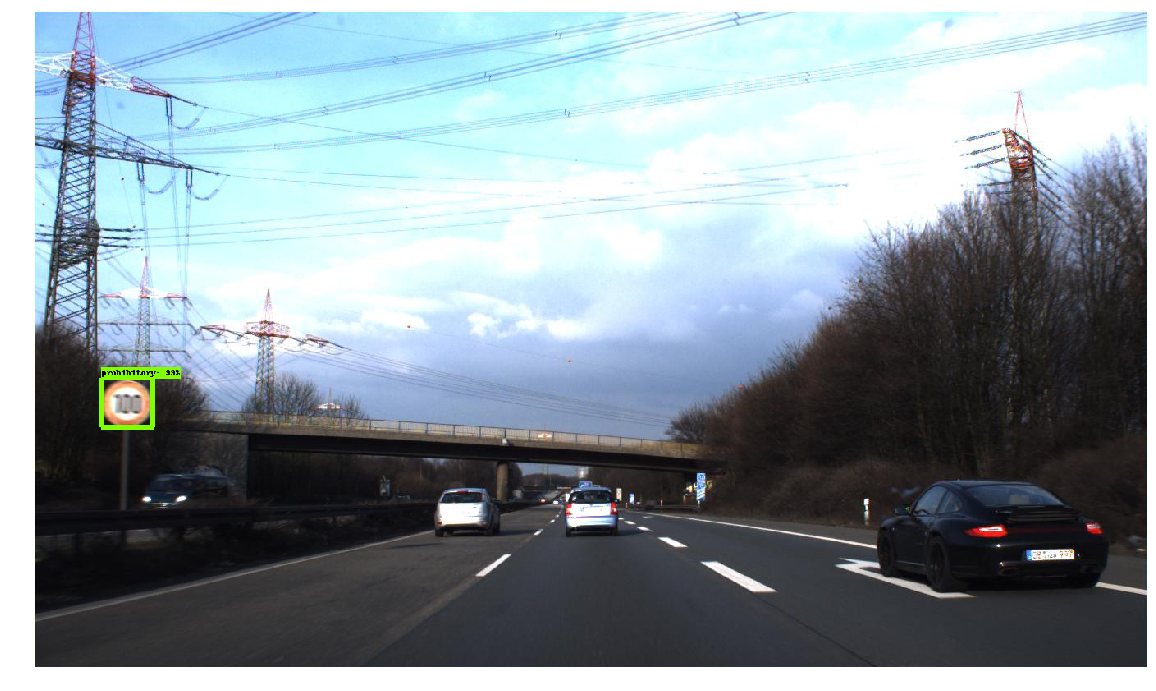

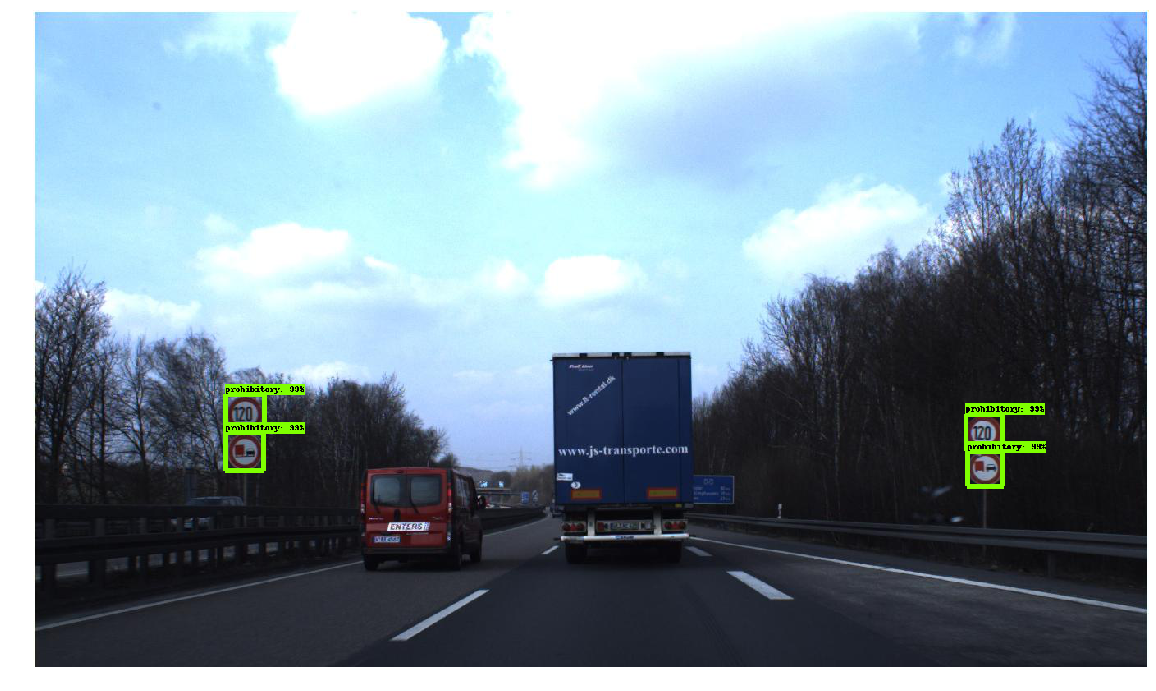

In [18]:
i=0
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        for idx, image_path in enumerate(TEST_IMAGE_PATHS):
            image = Image.open(image_path)
            # the array based representation of the image will be used later in order to prepare the
            # result image with boxes and labels on it.
            image_np = load_image_into_numpy_array(image)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            # Each box represents a part of the image where a particular object was detected.
            boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            # Each score represent how level of confidence for each of the objects.
            # Score is shown on the result image, together with the class label.
            scores = detection_graph.get_tensor_by_name('detection_scores:0')
            classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')
            # Actual detection.
            (boxes, scores, classes, num_detections) = sess.run(
                [boxes, scores, classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=6)
            fig=plt.figure(idx, figsize=IMAGE_SIZE)
            plt.axis('off')
            plt.imshow(image_np)
            plt.show()
            outpath="/home/sailokesh/Surendra/traffic-sign-detection/output_image/"
            #fig.savefig('/home/sailokesh/Surendra/traffic-sign-detection/output_image/image1.png')
            fig.savefig(os.path.join(outpath,"image_{0}.png".format(i)))
            i=i+1

# Darkflow
# Darkflow
#Model preparation


## Model preparation 

In [24]:
sys.path.append('/home/sailokesh/Surendra/darkflow-master/darkflow') # ~/darkflow
from darkflow.net.build import TFNet
import cv2

MODEL_NAME = 'yolo_v2'    #yolo_v2
MODEL_PATH = os.path.join('/home/sailokesh/Surendra/models', MODEL_NAME)
print(MODEL_PATH)
options = {'model': os.path.join(MODEL_PATH, '{}.cfg'.format(MODEL_NAME)),
           'labels': os.path.join(MODEL_PATH, 'labels.txt'),
           'backup': MODEL_PATH,
           'load' : 50500,
           'threshold': 0.1}

tfnet = TFNet(options)

/home/sailokesh/Surendra/models/yolo_v2
Parsing /home/sailokesh/Surendra/models/yolo_v2/yolo_v2.cfg
Loading None ...
Finished in 0.0003705024719238281s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
Instructions for updating:
Colocations handled automatically by placer.
       |        | input                            | (?, 608, 608, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?,

## Helper code

In [25]:
def plot_rectangle(bbox, ax, class_name, edgecolor, confidence=None):
    xmin = bbox[0]
    ymin = bbox[1]
    xmax = bbox[2]
    ymax = bbox[3]
    left = xmin
    right = xmax
    top = ymin
    bot = ymax
    ax.add_patch(
        plt.Rectangle((left, top),
                      right-left,
                      bot-top, fill=False,
                      edgecolor=edgecolor, linewidth=3.5)
        )
    label = '{:s}'.format(class_name)
    label_pos_y = top-10
    if confidence:
        label += ' {0:.2f}'.format(confidence)
        label_pos_y = bot+20
    ax.text(left, label_pos_y,label,
            bbox=dict(facecolor=edgecolor, alpha=0.5),
            fontsize=14, color='white')

In [26]:
def get_label_id(label_name):
    for category in categories:
        if category['name'] == label_name:
            return category['id']

## Detection

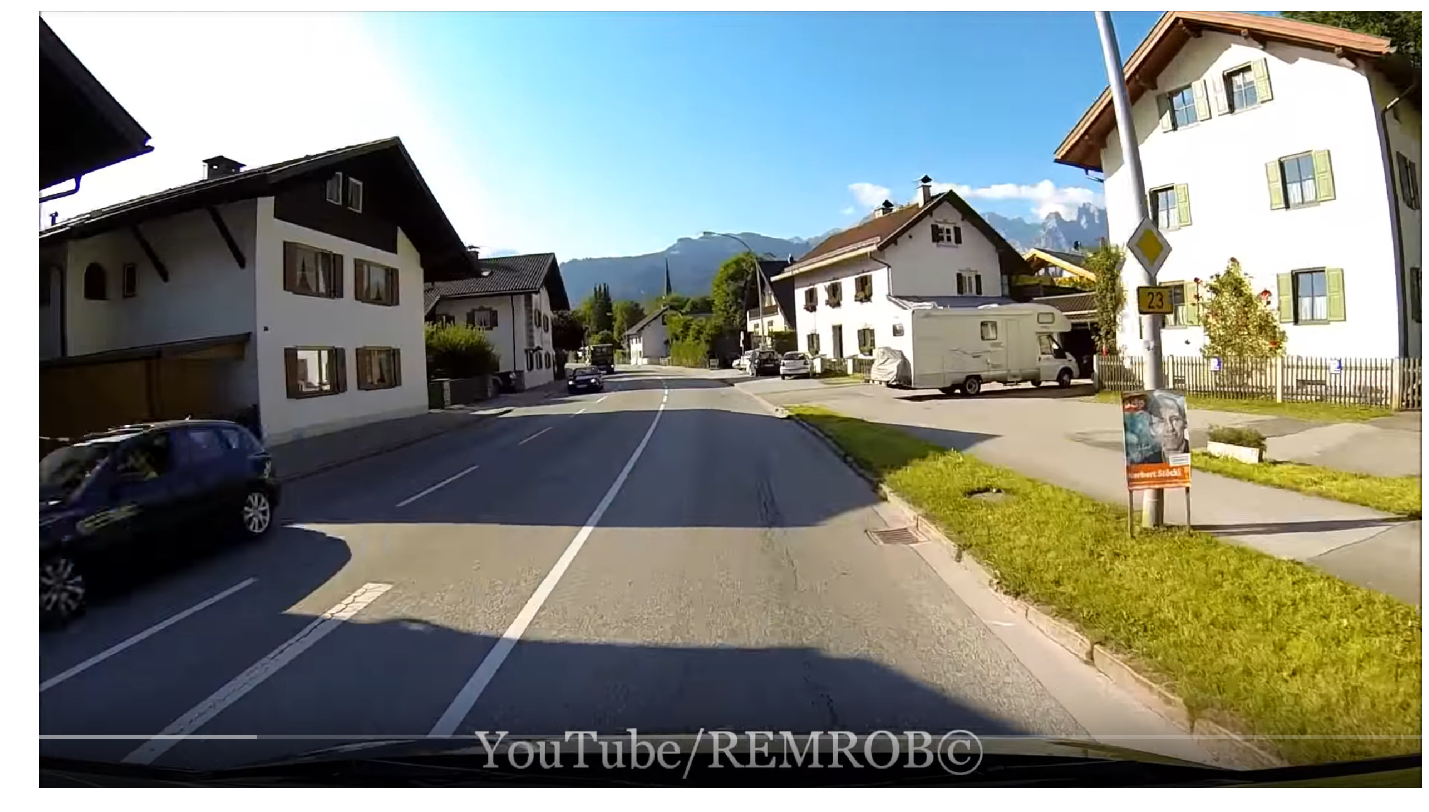

KeyError: None

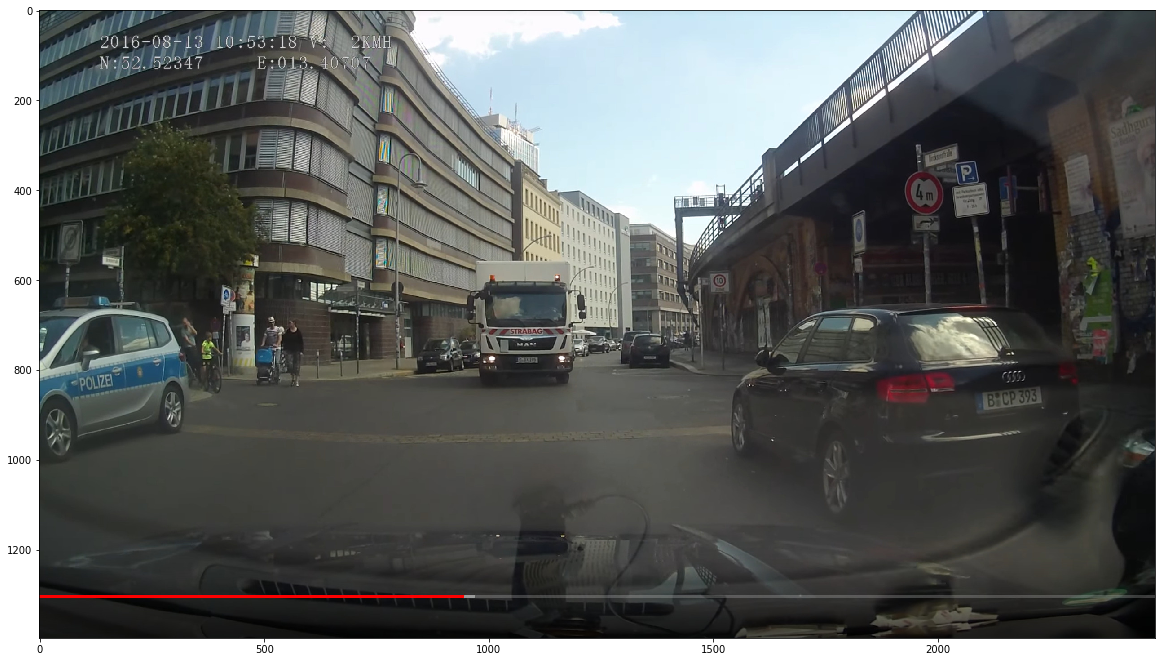

In [27]:
min_score_thresh = 0.5
i=0
for image_path in TEST_IMAGE_PATHS:
    fig, ax = plt.subplots(figsize=(20, 20))
    image = Image.open(image_path)
    image_name = os.path.basename(image_path)
    width, height = image.size
    ax.imshow(image)
    
    image_np = load_image_into_numpy_array(image)
    image_np = image_np[:,:,::-1] # rgb -> bgr
    pred_results = tfnet.return_predict(image_np)

    for idx, det in enumerate(pred_results):
        score = det['confidence']
        if score > min_score_thresh:
            bbox = det['topleft']['x'], det['topleft']['y'], det['bottomright']['x'], det['bottomright']['y']
            label = get_label_id(det['label'])
            plot_rectangle(bbox,ax,category_index[label]['name'],'red', score)
    plt.draw()
    fig.tight_layout()
    plt.axis('off')
    plt.show()
    outpath='/home/sailokesh/Surendra/traffic-sign-detection/output_image'
    fig.savefig(os.path.join(outpath,"dimage_{0}.png".format(i)))
    i=i+1